In [1]:
%matplotlib inline

In [2]:
import os
import random as python_random
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns

In [3]:
seed = 6902

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(seed)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(seed)

In [4]:
sns.set(context="notebook", style="darkgrid", palette="deep", font="sans-serif", font_scale=1.0, color_codes=True)

In [5]:
os.makedirs("./img/", exist_ok=True)

In [6]:
mu = np.linspace(-10, 10, 100)
sigma = np.linspace(0.1, 10., 100)
num_samples = 10000

x = np.random.randn(num_samples, 1, 1) * sigma.reshape(1, 1, -1) + mu.reshape(1, -1, 1)
y = np.tanh(x)
mc_mu = y.mean(axis=0)
mc_sigma = y.std(axis=0)

gauss_mu = np.tanh(np.expand_dims(mu, -1) / np.sqrt(1. + 0.5 * np.pi * np.expand_dims(sigma, 0) ** 2))
gauss_sigma = (1. + gauss_mu) * (1. - gauss_mu) * (1. - 1. / np.sqrt(1. + 0.5 * np.pi * np.expand_dims(sigma, 0) ** 2))
gauss_sigma = np.sqrt(gauss_sigma)

taylor_mu = np.tanh(np.expand_dims(mu, -1)) * np.ones_like(np.expand_dims(sigma, 0))
taylor_sigma = (1.0 - taylor_mu ** 2) * np.expand_dims(sigma, 0)

diff1_mu = np.fabs(gauss_mu - mc_mu)
diff1_sigma = np.fabs(gauss_sigma - mc_sigma)

diff2_mu = np.fabs(taylor_mu - mc_mu)
diff2_sigma = np.fabs(taylor_sigma - mc_sigma)

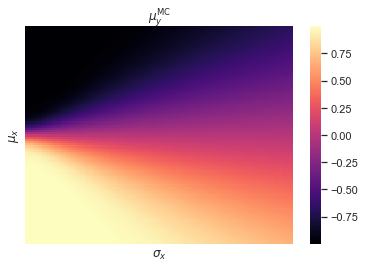

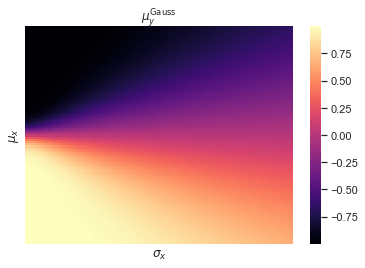

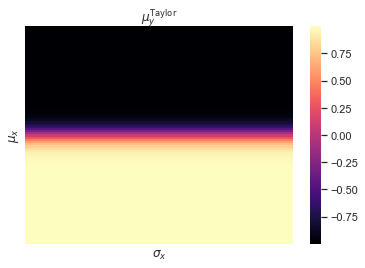

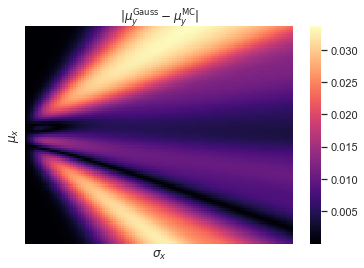

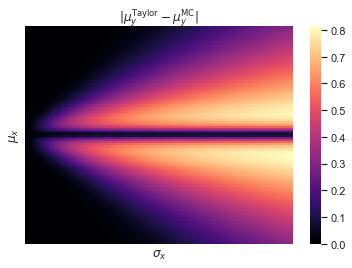

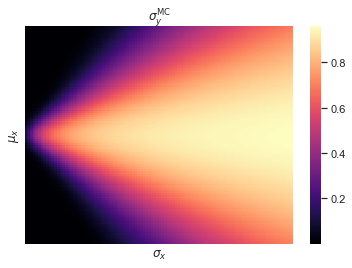

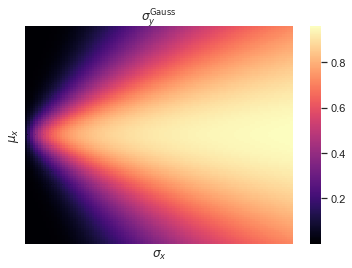

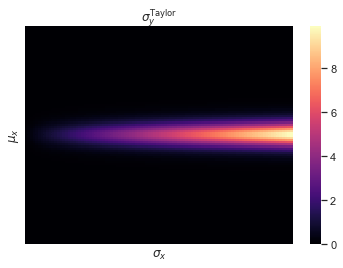

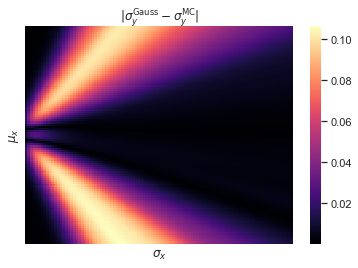

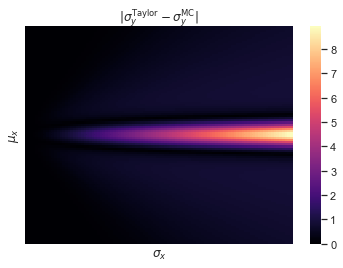

In [7]:
fig, ax = plt.subplots()
ax = sns.heatmap(mc_mu, cmap="magma", ax=ax)
ax.set_xlabel(r"$\sigma_x$")
ax.set_ylabel(r"$\mu_x$")
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_title(r"$\mu_y^\mathrm{MC}$")
fig.savefig("img/error_tanh_norm_mu_mc.pdf", bbox_inches="tight")

fig, ax = plt.subplots()
ax = sns.heatmap(gauss_mu, cmap="magma", ax=ax)
ax.set_xlabel(r"$\sigma_x$")
ax.set_ylabel(r"$\mu_x$")
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_title(r"$\mu_y^\mathrm{Gauss}$")
fig.savefig("img/error_tanh_norm_mu_gauss.pdf", bbox_inches="tight")

fig, ax = plt.subplots()
ax = sns.heatmap(taylor_mu, cmap="magma", ax=ax)
ax.set_xlabel(r"$\sigma_x$")
ax.set_ylabel(r"$\mu_x$")
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_title(r"$\mu_y^\mathrm{Taylor}$")
fig.savefig("img/error_tanh_norm_mu_taylor.pdf", bbox_inches="tight")

fig, ax = plt.subplots()
ax = sns.heatmap(diff1_mu, cmap="magma", ax=ax)
ax.set_xlabel(r"$\sigma_x$")
ax.set_ylabel(r"$\mu_x$")
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_title(r"$| \mu_y^\mathrm{Gauss} - \mu_y^\mathrm{MC}|$")
fig.savefig("img/error_tanh_norm_mu_gauss-mc.pdf", bbox_inches="tight")

fig, ax = plt.subplots()
ax = sns.heatmap(diff2_mu, cmap="magma", ax=ax)
ax.set_xlabel(r"$\sigma_x$")
ax.set_ylabel(r"$\mu_x$")
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_title(r"$| \mu_y^\mathrm{Taylor} - \mu_y^\mathrm{MC}|$")
fig.savefig("img/error_tanh_norm_mu_taylor-mc.pdf", bbox_inches="tight")

fig, ax = plt.subplots()
ax = sns.heatmap(mc_sigma, cmap="magma", ax=ax)
ax.set_xlabel(r"$\sigma_x$")
ax.set_ylabel(r"$\mu_x$")
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_title(r"$\sigma_y^\mathrm{MC}$")
fig.savefig("img/error_tanh_norm_sigma_mc.pdf", bbox_inches="tight")

fig, ax = plt.subplots()
ax = sns.heatmap(gauss_sigma, cmap="magma", ax=ax)
ax.set_xlabel(r"$\sigma_x$")
ax.set_ylabel(r"$\mu_x$")
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_title(r"$\sigma_y^\mathrm{Gauss}$")
fig.savefig("img/error_tanh_norm_sigma_gauss.pdf", bbox_inches="tight")

fig, ax = plt.subplots()
ax = sns.heatmap(taylor_sigma, cmap="magma", ax=ax)
ax.set_xlabel(r"$\sigma_x$")
ax.set_ylabel(r"$\mu_x$")
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_title(r"$\sigma_y^\mathrm{Taylor}$")
fig.savefig("img/error_tanh_norm_sigma_taylor.pdf", bbox_inches="tight")

fig, ax = plt.subplots()
ax = sns.heatmap(diff1_sigma, cmap="magma", ax=ax)
ax.set_xlabel(r"$\sigma_x$")
ax.set_ylabel(r"$\mu_x$")
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_title(r"$| \sigma_y^\mathrm{Gauss} - \sigma_y^\mathrm{MC}|$")
fig.savefig("img/error_tanh_norm_sigma_gauss-mc.pdf", bbox_inches="tight")

fig, ax = plt.subplots()
ax = sns.heatmap(diff2_sigma, cmap="magma", ax=ax)
ax.set_xlabel(r"$\sigma_x$")
ax.set_ylabel(r"$\mu_x$")
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_title(r"$| \sigma_y^\mathrm{Taylor} - \sigma_y^\mathrm{MC}|$")
fig.savefig("img/error_tanh_norm_sigma_taylor-mc.pdf", bbox_inches="tight")

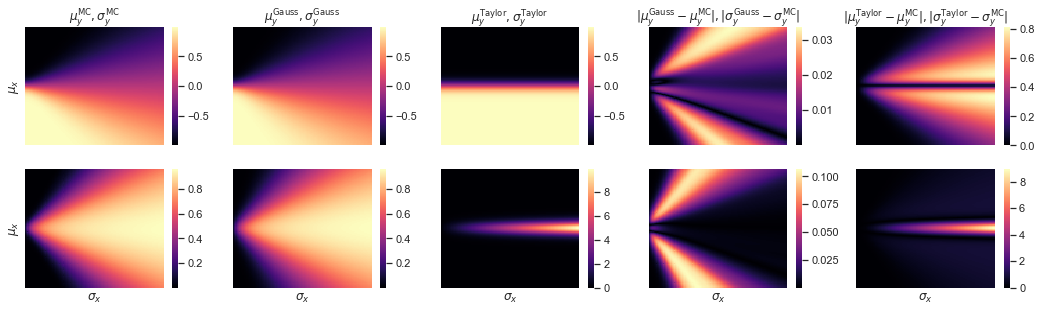

In [8]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(figsize=(18, 4.8), nrows=2, ncols=5, sharex=True, sharey=True)

ax1 = sns.heatmap(mc_mu, cmap="magma", ax=ax1)
ax1.set_ylabel(r"$\mu_x$")
ax1.set_xticks([]) 
ax1.set_yticks([]) 
ax1.set_title(r"$\mu_y^\mathrm{MC}, \sigma_y^\mathrm{MC}$")

ax2 = sns.heatmap(gauss_mu, cmap="magma", ax=ax2)
ax2.set_xticks([]) 
ax2.set_yticks([]) 
ax2.set_title(r"$\mu_y^\mathrm{Gauss}, \sigma_y^\mathrm{Gauss}$")

ax3 = sns.heatmap(taylor_mu, cmap="magma", ax=ax3)
ax3.set_xticks([]) 
ax3.set_yticks([]) 
ax3.set_title(r"$\mu_y^\mathrm{Taylor}, \sigma_y^\mathrm{Taylor}$")

ax4 = sns.heatmap(diff1_mu, cmap="magma", ax=ax4)
ax4.set_xticks([]) 
ax4.set_yticks([]) 
ax4.set_title(r"$| \mu_y^\mathrm{Gauss} - \mu_y^\mathrm{MC}|, | \sigma_y^\mathrm{Gauss} - \sigma_y^\mathrm{MC}|$")

ax5 = sns.heatmap(diff2_mu, cmap="magma", ax=ax5)
ax5.set_xticks([]) 
ax5.set_yticks([]) 
ax5.set_title(r"$| \mu_y^\mathrm{Taylor} - \mu_y^\mathrm{MC}|, | \sigma_y^\mathrm{Taylor} - \sigma_y^\mathrm{MC}|$")

ax6 = sns.heatmap(mc_sigma, cmap="magma", ax=ax6)
ax6.set_xlabel(r"$\sigma_x$")
ax6.set_ylabel(r"$\mu_x$")
ax6.set_xticks([]) 
ax6.set_yticks([]) 

ax7 = sns.heatmap(gauss_sigma, cmap="magma", ax=ax7)
ax7.set_xlabel(r"$\sigma_x$")
ax7.set_xticks([]) 
ax7.set_yticks([]) 

ax8 = sns.heatmap(taylor_sigma, cmap="magma", ax=ax8)
ax8.set_xlabel(r"$\sigma_x$")
ax8.set_xticks([]) 
ax8.set_yticks([]) 

ax9 = sns.heatmap(diff1_sigma, cmap="magma", ax=ax9)
ax9.set_xlabel(r"$\sigma_x$")
ax9.set_xticks([]) 
ax9.set_yticks([]) 

ax10 = sns.heatmap(diff2_sigma, cmap="magma", ax=ax10)
ax10.set_xlabel(r"$\sigma_x$")
ax10.set_xticks([]) 
ax10.set_yticks([]) 

fig.savefig("img/error_tanh_norm.pdf", bbox_inches="tight")

In [9]:
mu = np.linspace(-10, 10, 100)
sigma = np.linspace(0.1, 10., 100)
num_samples = 10000

x = np.random.rand(num_samples, 1, 1) * 2. *  np.sqrt(3.) * sigma.reshape((1, 1, -1)) + mu.reshape((1,  -1, 1)) - np.sqrt(3.) * sigma.reshape((1, 1, -1))
y = np.tanh(x)
mc_mu = y.mean(axis=0)
mc_sigma = y.std(axis=0)

gauss_mu = np.tanh(np.expand_dims(mu, -1) / np.sqrt(1. + 0.5 * np.pi * np.expand_dims(sigma, 0) ** 2))
gauss_sigma = (1. + gauss_mu) * (1. - gauss_mu) * (1. - 1. / np.sqrt(1. + 0.5 * np.pi * np.expand_dims(sigma, 0) ** 2))
gauss_sigma = np.sqrt(gauss_sigma)

taylor_mu = np.tanh(np.expand_dims(mu, -1)) * np.ones_like(np.expand_dims(sigma, 0))
taylor_sigma = (1.0 - taylor_mu ** 2) * np.expand_dims(sigma, 0)

diff1_mu = np.fabs(gauss_mu - mc_mu)
diff1_sigma = np.fabs(gauss_sigma - mc_sigma)

diff2_mu = np.fabs(taylor_mu - mc_mu)
diff2_sigma = np.fabs(taylor_sigma - mc_sigma)

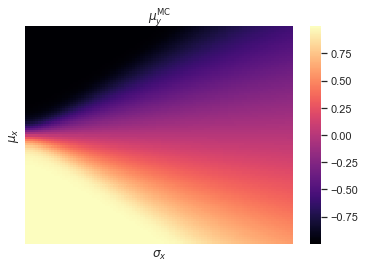

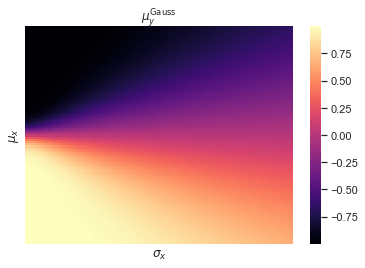

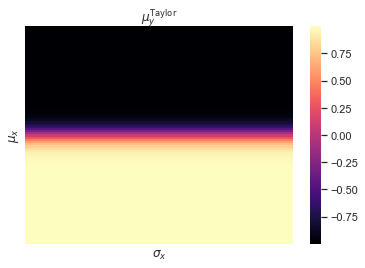

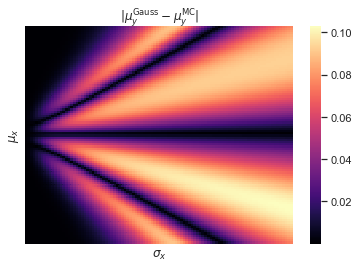

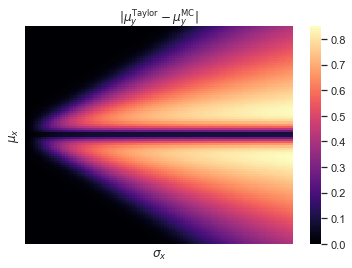

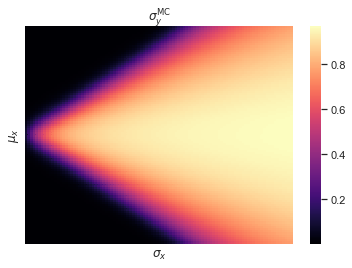

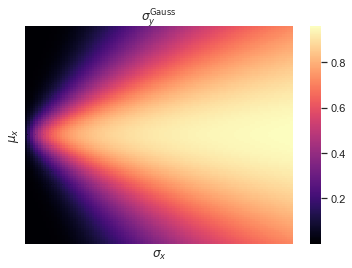

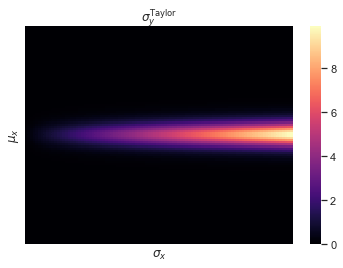

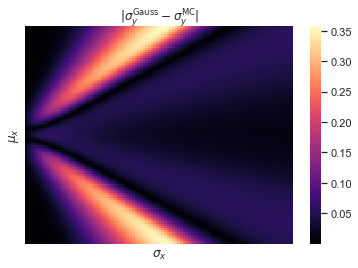

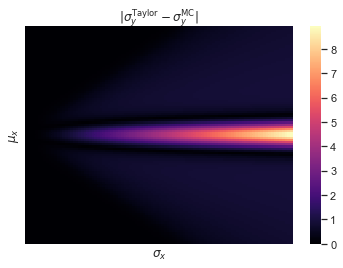

In [10]:
fig, ax = plt.subplots()
ax = sns.heatmap(mc_mu, cmap="magma", ax=ax)
ax.set_xlabel(r"$\sigma_x$")
ax.set_ylabel(r"$\mu_x$")
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_title(r"$\mu_y^\mathrm{MC}$")
fig.savefig("img/error_tanh_uniform_mu_mc.pdf", bbox_inches="tight")

fig, ax = plt.subplots()
ax = sns.heatmap(gauss_mu, cmap="magma", ax=ax)
ax.set_xlabel(r"$\sigma_x$")
ax.set_ylabel(r"$\mu_x$")
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_title(r"$\mu_y^\mathrm{Gauss}$")
fig.savefig("img/error_tanh_uniform_mu_gauss.pdf", bbox_inches="tight")

fig, ax = plt.subplots()
ax = sns.heatmap(taylor_mu, cmap="magma", ax=ax)
ax.set_xlabel(r"$\sigma_x$")
ax.set_ylabel(r"$\mu_x$")
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_title(r"$\mu_y^\mathrm{Taylor}$")
fig.savefig("img/error_tanh_uniform_mu_taylor.pdf", bbox_inches="tight")

fig, ax = plt.subplots()
ax = sns.heatmap(diff1_mu, cmap="magma", ax=ax)
ax.set_xlabel(r"$\sigma_x$")
ax.set_ylabel(r"$\mu_x$")
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_title(r"$| \mu_y^\mathrm{Gauss} - \mu_y^\mathrm{MC}|$")
fig.savefig("img/error_tanh_uniform_mu_gauss-mc.pdf", bbox_inches="tight")

fig, ax = plt.subplots()
ax = sns.heatmap(diff2_mu, cmap="magma", ax=ax)
ax.set_xlabel(r"$\sigma_x$")
ax.set_ylabel(r"$\mu_x$")
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_title(r"$| \mu_y^\mathrm{Taylor} - \mu_y^\mathrm{MC}|$")
fig.savefig("img/error_tanh_uniform_mu_mc-taylor.pdf", bbox_inches="tight")

fig, ax = plt.subplots()
ax = sns.heatmap(mc_sigma, cmap="magma", ax=ax)
ax.set_xlabel(r"$\sigma_x$")
ax.set_ylabel(r"$\mu_x$")
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_title(r"$\sigma_y^\mathrm{MC}$")
fig.savefig("img/error_tanh_uniform_sigma_mc.pdf", bbox_inches="tight")

fig, ax = plt.subplots()
ax = sns.heatmap(gauss_sigma, cmap="magma", ax=ax)
ax.set_xlabel(r"$\sigma_x$")
ax.set_ylabel(r"$\mu_x$")
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_title(r"$\sigma_y^\mathrm{Gauss}$")
fig.savefig("img/error_tanh_uniform_sigma_gauss.pdf", bbox_inches="tight")

fig, ax = plt.subplots()
ax = sns.heatmap(taylor_sigma, cmap="magma", ax=ax)
ax.set_xlabel(r"$\sigma_x$")
ax.set_ylabel(r"$\mu_x$")
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_title(r"$\sigma_y^\mathrm{Taylor}$")
fig.savefig("img/error_tanh_uniform_sigma_taylor.pdf", bbox_inches="tight")

fig, ax = plt.subplots()
ax = sns.heatmap(diff1_sigma, cmap="magma", ax=ax)
ax.set_xlabel(r"$\sigma_x$")
ax.set_ylabel(r"$\mu_x$")
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_title(r"$| \sigma_y^\mathrm{Gauss} - \sigma_y^\mathrm{MC}|$")
fig.savefig("img/error_tanh_uniform_sigma_gauss-mc.pdf", bbox_inches="tight")

fig, ax = plt.subplots()
ax = sns.heatmap(diff2_sigma, cmap="magma", ax=ax)
ax.set_xlabel(r"$\sigma_x$")
ax.set_ylabel(r"$\mu_x$")
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_title(r"$| \sigma_y^\mathrm{Taylor} - \sigma_y^\mathrm{MC}|$")
fig.savefig("img/error_tanh_uniform_sigma_taylor-mc.pdf", bbox_inches="tight")

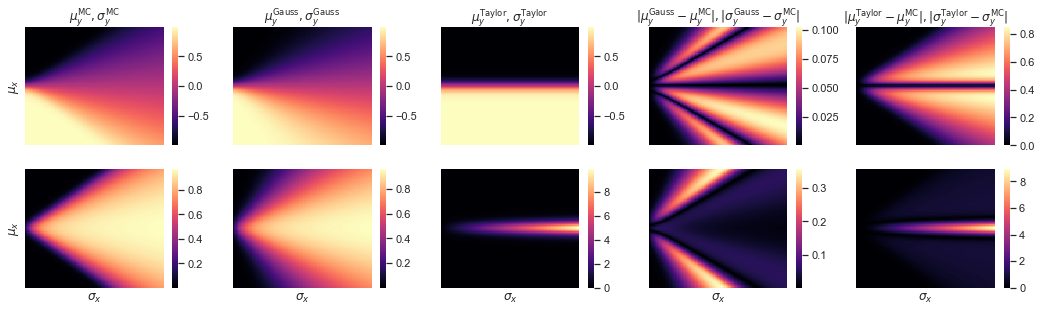

In [11]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(figsize=(18, 4.8), nrows=2, ncols=5, sharex=True, sharey=True)

ax1 = sns.heatmap(mc_mu, cmap="magma", ax=ax1)
ax1.set_ylabel(r"$\mu_x$")
ax1.set_xticks([]) 
ax1.set_yticks([]) 
ax1.set_title(r"$\mu_y^\mathrm{MC}, \sigma_y^\mathrm{MC}$")

ax2 = sns.heatmap(gauss_mu, cmap="magma", ax=ax2)
ax2.set_xticks([]) 
ax2.set_yticks([]) 
ax2.set_title(r"$\mu_y^\mathrm{Gauss}, \sigma_y^\mathrm{Gauss}$")

ax3 = sns.heatmap(taylor_mu, cmap="magma", ax=ax3)
ax3.set_xticks([]) 
ax3.set_yticks([]) 
ax3.set_title(r"$\mu_y^\mathrm{Taylor}, \sigma_y^\mathrm{Taylor}$")

ax4 = sns.heatmap(diff1_mu, cmap="magma", ax=ax4)
ax4.set_xticks([]) 
ax4.set_yticks([]) 
ax4.set_title(r"$| \mu_y^\mathrm{Gauss} - \mu_y^\mathrm{MC}|, | \sigma_y^\mathrm{Gauss} - \sigma_y^\mathrm{MC}|$")

ax5 = sns.heatmap(diff2_mu, cmap="magma", ax=ax5)
ax5.set_xticks([]) 
ax5.set_yticks([]) 
ax5.set_title(r"$| \mu_y^\mathrm{Taylor} - \mu_y^\mathrm{MC}|, | \sigma_y^\mathrm{Taylor} - \sigma_y^\mathrm{MC}|$")

ax6 = sns.heatmap(mc_sigma, cmap="magma", ax=ax6)
ax6.set_xlabel(r"$\sigma_x$")
ax6.set_ylabel(r"$\mu_x$")
ax6.set_xticks([]) 
ax6.set_yticks([]) 

ax7 = sns.heatmap(gauss_sigma, cmap="magma", ax=ax7)
ax7.set_xlabel(r"$\sigma_x$")
ax7.set_xticks([]) 
ax7.set_yticks([]) 

ax8 = sns.heatmap(taylor_sigma, cmap="magma", ax=ax8)
ax8.set_xlabel(r"$\sigma_x$")
ax8.set_xticks([]) 
ax8.set_yticks([]) 

ax9 = sns.heatmap(diff1_sigma, cmap="magma", ax=ax9)
ax9.set_xlabel(r"$\sigma_x$")
ax9.set_xticks([]) 
ax9.set_yticks([]) 

ax10 = sns.heatmap(diff2_sigma, cmap="magma", ax=ax10)
ax10.set_xlabel(r"$\sigma_x$")
ax10.set_xticks([]) 
ax10.set_yticks([]) 

fig.savefig("img/error_tanh_uniform.pdf", bbox_inches="tight")